# Automated Essay Scoring (AES)

Essays are crucial testing tools for assessing academic achievement, integration of ideas and ability, but are expensive and time consuming to grade manually. Automated essay scoring (AES) saves the efforts of human graders and hence significantly reduces costs and time. In some high stakes examinations, AES is used so there is no need to have a second human grader to verify or compare; In low stakes evaluations, AES is the only grading scheme. 

Previous studies have included baseline features:
1. Bag of Words (BOW) counts (10000 words with maximum frequency)
2. Number of characters 
3. Number of words 
4. Number of sentences 
5. Average word length
6. Number of lemmas
7. Number of spellng errors 
8. Number of nouns
9. Number of adjectives 
10. Number of verbs 
11. Number of adverbs 

In addition to those features, this project tries to extract 
1. sentiment features
2. content features
3. grammar features 

## Goal

1. What kind of features could imporve AES models so it grades as close as to the human graders. 

2. Different AES models will also be compared. 

# Data

## Dataset from kaggle.com, by the William and Flora Hewlett Foundation.

|Type of Essay|grade level|number of training |number of validation|
|----------|-------------------|--------------|------|
|narrative/persuasive/expository|8|1785|592 
|narrative/persuasive/expository|10|1800|600| 
|source dependent|10|1726|575|
|source dependent|10|1772|589|
|source dependent|8|1805|601|
|source dependent|10|1800|600|
|narrative/persuasive/expository|7|1730|576|
|narrative/persuasive/expository|10|918|305|

## Example: Essay set 1 prompt


More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends. 

Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.


# Descriptive Analysis

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import re, collections
from sklearn.ensemble import RandomForestRegressor
from itertools import chain

In [5]:
#read in training data
df = pd.read_excel("training_set_rel3.xls")

In [6]:
data = df[['essay_set','essay','domain1_score']].copy()
print(data)

       essay_set                                              essay  \
0              1  Dear local newspaper, I think effects computer...   
1              1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2              1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3              1  Dear Local Newspaper, @CAPS1 I have found that...   
4              1  Dear @LOCATION1, I know having computers has a...   
5              1  Dear @LOCATION1, I think that computers have a...   
6              1  Did you know that more and more people these d...   
7              1  @PERCENT1 of people agree that computers make ...   
8              1  Dear reader, @ORGANIZATION1 has had a dramatic...   
9              1  In the @LOCATION1 we have the technology of a ...   
10             1  Dear @LOCATION1, @CAPS1 people acknowledge the...   
11             1  Dear @CAPS1 @CAPS2 I feel that computers do ta...   
12             1  Dear local newspaper I raed ur argument on the...   
13    

/Users/pengluyao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


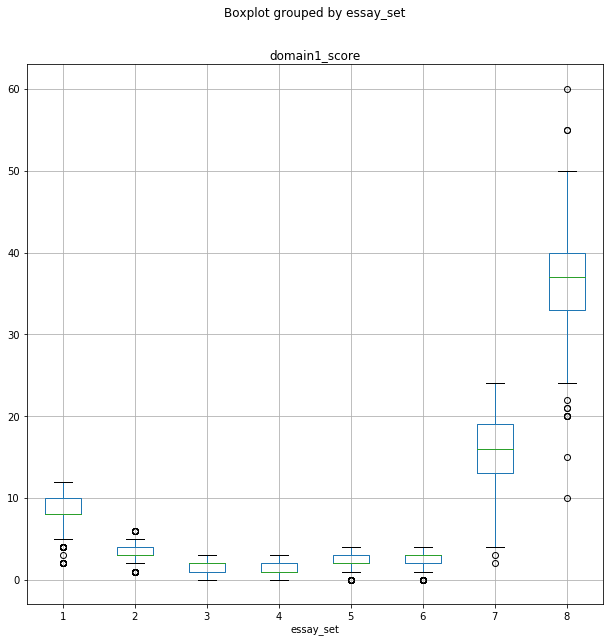

In [7]:
df.boxplot(column = 'domain1_score', by = 'essay_set', figsize = (10, 10))

In [8]:
#Putting essays, essay_set into dictionary and calculate each essay length
train_data = {}
for index, row in df.iterrows():
    essay = row["essay"].strip().split(" ")
    essay_set = row['essay_set']
    domain1_score = row['domain1_score']/2
    length = len(essay)
    if essay_set not in train_data:
        train_data[essay_set] = {"essay":[], "score":[], "length":[]}
    train_data[essay_set]["essay"].append(essay)
    train_data[essay_set]['score'].append(domain1_score)
    train_data[essay_set]['length'].append(length)

## Baseline feature extractions
Baseline features include total essay length, sentence length and density, word length and frequency etc. 

/Users/pengluyao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


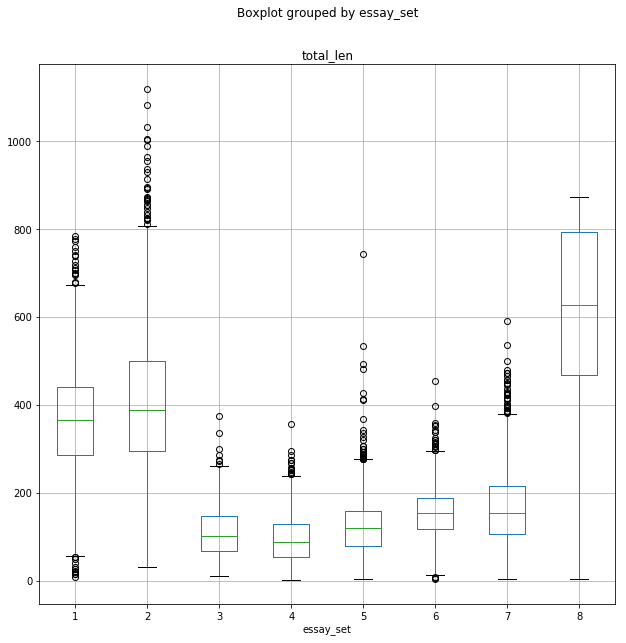

In [9]:
total_len = []
for set in range(1,9):
    len_by_set = train_data[set]["length"]
    total_len.append(len_by_set)

total_len = list(chain(*total_len))
df['total_len'] = pd.Series(total_len)
df.boxplot(column = 'total_len', by = 'essay_set', figsize = (10, 10))

In [ ]:
#get word count discarding punctuations:
def get_word_count(essay):
    return len(re.findall(r"\s", essay))+1

# get sentence
def sent_num(essay):
    sentences_num = len(sent_tokenize(essay))
    return sentences_num

#get sentenceASC length:
def sent_len(essay):
    sentence = sent_tokenize(essay)
    sentence_len = len(word_tokenize(sentence))
    return sentence_len